# Skin Diseases Image Analysis

We are going to use kaggle image dataset (https://www.kaggle.com/datasets/subirbiswas19/skin-disease-dataset) to illustrate the image analysis and create a CNN-DNN model architecture for classification. This model will then be used for analysis & classification of new set of skin disease images.

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten,GlobalMaxPool1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.callbacks import Callback
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Training & Validation Generators

In [48]:
image_size=150

In [49]:
def data_generators(train_dataset,validation_dataset):
    train_data_gen=ImageDataGenerator(rescale=1.0/255.0)
      #                               rotation_range=40,
      #                               width_shift_range=0.2,
      #                               height_shift_range=0.2,
      #                               shear_range=0.2,
      #                               zoom_range=0.2,
      #                               horizontal_flip=True,
      #                               fill_mode='nearest')
    training_data=train_data_gen.flow_from_directory(directory=train_dataset,class_mode='categorical',batch_size=50,target_size=(image_size,image_size))
    validation_data_gen=ImageDataGenerator(rescale=1.0/255.0)
    validation_data=validation_data_gen.flow_from_directory(directory=validation_dataset,class_mode='categorical',batch_size=50,target_size=(image_size,image_size))

    return training_data,validation_data    

In [50]:
train_dataset=r'D:\Kaggle-Competitions\Skin Diseases\data\train_set'
vaidation_dataset=r'D:\Kaggle-Competitions\Skin Diseases\data\test_set'
training_data,validation_data=data_generators(train_dataset,vaidation_dataset)

Found 924 images belonging to 8 classes.
Found 233 images belonging to 8 classes.


# Get labels into a list for classification

In [51]:
inference_labels=os.listdir(r'D:\Kaggle-Competitions\Skin Diseases\data\train_set')
class_count=len(inference_labels)

# Callbacks

In [52]:
class myCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training when the loss falls below 0.1

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''
    # Check the loss
    if(logs.get('loss') < 0.1):
      # Stop if threshold is met
      print("\nLoss is lower than 0.1 so cancelling training!")
      self.model.stop_training = True
                
    
# Instantiate class
callbacks = myCallback()

# Define model architecture and compilation

In [53]:
def create_model():
    model=Sequential([
            Conv2D(256,(3,3),activation='relu',input_shape=(image_size,image_size,3)),
            MaxPooling2D(2,2),
            Conv2D(128,(3,3),activation='relu'),
            MaxPooling2D(2,2),
            Conv2D(64,(3,3),activation='relu'),
            MaxPooling2D(2,2),
            Conv2D(32,(3,3),activation='relu'),
            MaxPooling2D(2,2),
            Flatten(),
            Dense(1024,activation='relu'),
            Dropout(0.4),
            Dense(512,activation='relu'),
            Dropout(0.4),
            Dense(class_count,activation='softmax')
        ])
    
    model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['Accuracy'])
    
    return model

# Training the model

In [54]:
model=create_model()
history=model.fit(training_data,epochs=25,verbose=1,validation_data=validation_data,callbacks=[callbacks])

Epoch 1/25
19/19 [==============================] - 78s 4s/step - loss: 2.0764 - Accuracy: 0.1342 - val_loss: 2.0591 - val_Accuracy: 0.1416
Epoch 2/25
19/19 [==============================] - 74s 4s/step - loss: 2.0581 - Accuracy: 0.1786 - val_loss: 2.0425 - val_Accuracy: 0.1674
Epoch 3/25
19/19 [==============================] - 74s 4s/step - loss: 1.9940 - Accuracy: 0.2338 - val_loss: 1.9321 - val_Accuracy: 0.2060
Epoch 4/25
19/19 [==============================] - 74s 4s/step - loss: 1.8131 - Accuracy: 0.3128 - val_loss: 1.7373 - val_Accuracy: 0.4077
Epoch 5/25
19/19 [==============================] - 79s 4s/step - loss: 1.5208 - Accuracy: 0.4448 - val_loss: 1.7231 - val_Accuracy: 0.3948
Epoch 6/25
19/19 [==============================] - 79s 4s/step - loss: 1.3839 - Accuracy: 0.5087 - val_loss: 1.5289 - val_Accuracy: 0.4549
Epoch 7/25
19/19 [==============================] - 74s 4s/step - loss: 1.1964 - Accuracy: 0.5747 - val_loss: 1.3000 - val_Accuracy: 0.5622
Epoch 8/25
19/19 [==

# Plot the accuracy

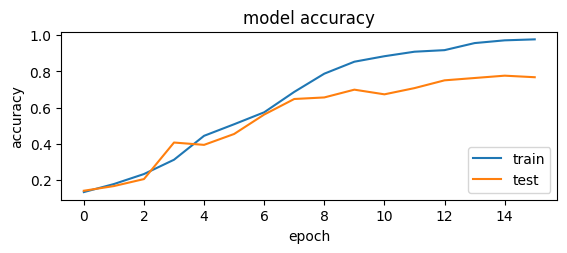

In [62]:
import matplotlib.pyplot as plot
plot.subplot(2,1,1)
plot.plot(history.history['Accuracy'])
plot.plot(history.history['val_Accuracy'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='lower right')

# Plot the loss

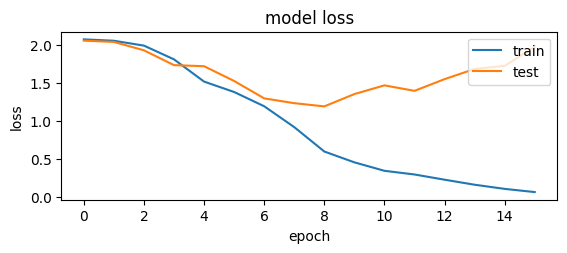

In [63]:
plot.subplot(2,1,2)
plot.plot(history.history['loss'])
plot.plot(history.history['val_loss'])
plot.title('model loss')
plot.ylabel('loss')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='upper right')

# Model Predictions

1/1 [==============================] - 0s 42ms/step
[[2.1052156e-09 5.7582241e-07 2.0187869e-04 9.0551853e-01 9.4278932e-02
  6.5775751e-08 3.7851203e-10 2.7525681e-08]]


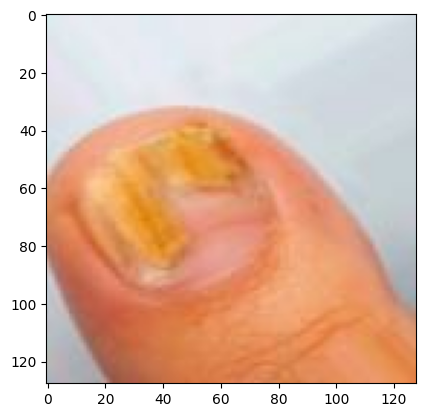

Inference is FU-nail-fungus


In [59]:
image_path="./tmp/skin-test4.jpg"
image = load_img(image_path, target_size=(image_size, image_size))
x=img_to_array(image)
x /= 255.0
x=np.expand_dims(x, axis=0)
classes = model.predict(x)
print(classes)
img = mpimg.imread(image_path)
plt.imshow(img)
plt.show()
category=np.array(classes[0]).argmax()
print("Inference is " + inference_labels[category])